<b>Business Problem</b><br>Given the information of users,their summary statistics,their age group and web session records etc.I need to predict in which country a new user will make his/her first booking.The Dataset is downloaded from kaggle and the dataset is provided by Airbnb. 

<b>Business Constraints</b>

1.No strict or low latency requirements<br> 
2.Model should output the class probabilties

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Reading Data</h1>

In [99]:
data_users=pd.read_csv('train_users_2.csv')
data_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up

Signup_Flow:the page a user came to signup up from

In [12]:
test_users=pd.read_csv('test_users.csv')
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


Date_first_booking will not be useful feature for me because I need to predict the Country in Which the user will first book his ticket.

In [61]:
print(data_users.shape) 

(213451, 16)


There are total of 213451 users.

In [14]:
#Checking for nan values in signup_method
print(data_users['signup_method'].isnull().sum())

0


In [4]:
#Number of columns in dataset
print(data_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
None


<h1>Data Analysis on signup_method</h1>

In [7]:
#Data Analysis on signup_method
unique_signup_methods=data_users['signup_method'].value_counts()
print(unique_signup_methods)

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64


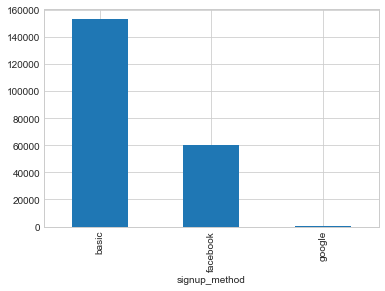

In [62]:
data_users.groupby("signup_method")['id'].count().plot.bar()

In [12]:
print("Percentage of users who choose basic method for signup are  {0}".format(unique_signup_methods[0]/len(data_users)*100))
print("Percentage of users who choose Facebook  for signup are  {0}".format(unique_signup_methods[1]/len(data_users)*100))
print("Percentage of users who choose Google for signup are  {0}".format(unique_signup_methods[2]/len(data_users)*100))

Percentage of users who choose basic method for signup are  71.630959798736
Percentage of users who choose Facebook  for signup are  28.113243788972646
Percentage of users who choose Google for signup are  0.2557964122913456


So there are 3 unique methods through which user can login in the airbnb system.And more than 70% of the people have chosen basic method to complete signup 

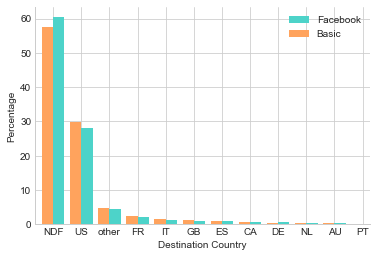

In [105]:
#Univariate Analysis on Device_type
fb_signup = sum(data_users['signup_method'] == 'facebook')
basic_signup = sum(data_users['signup_method'] == 'basic')

fb_destinations = data_users.loc[data_users['signup_method'] == 'facebook', 'country_destination'].value_counts() / fb_signup * 100
basic_destinations = data_users.loc[data_users['signup_method'] == 'basic' , 'country_destination'].value_counts() / basic_signup * 100
# Bar width
width = 0.4

fb_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Facebook', rot=0)
basic_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Basic', rot=0)


plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

This plot is not much useful because almost identical distributions for facebook and basic signup_method of the plot is seen,Except NDF in all the other countries people using Basic method for signup are more than facebook

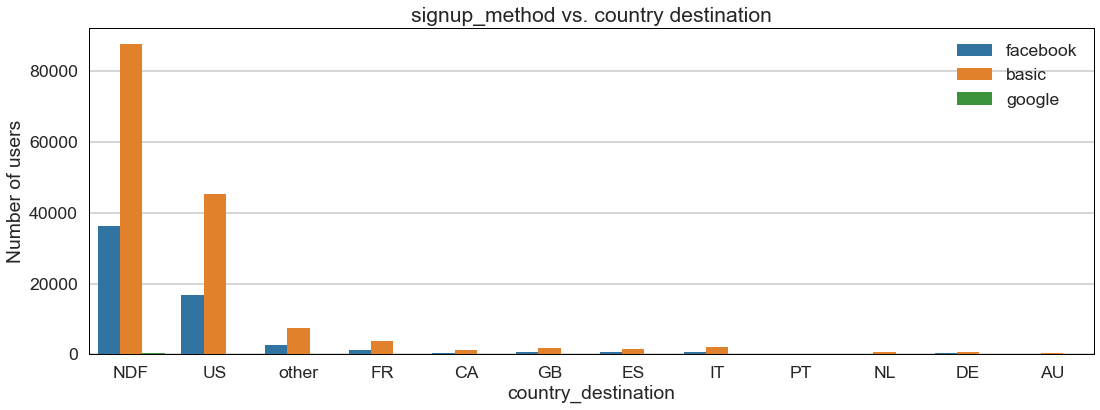

In [76]:
#Univariate Analysis on signup_method
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=data_users, hue='signup_method')
plt.ylabel('Number of users')
plt.title('signup_method vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

Most of the people have chosen the simple basic email method for performing the signup method

<h1>Data Analysis on First_Device_Type</h1>

In [19]:
#Checking for NULL values
print(data_users['first_device_type'].isnull().sum())

0


In [17]:
#Data Analysis on first_device_type
unique_first_device=data_users['first_device_type'].value_counts()
print(unique_first_device)

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64


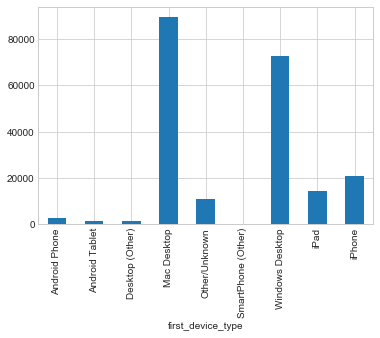

In [63]:
data_users.groupby("first_device_type")['id'].count().plot.bar()

In [18]:
print("Percentage of users who choose Mac Desktop for signup are  {0}".format(unique_first_device[0]/len(data_users)*100))
print("Percentage of users who choose Windows Desktop  for signup are  {0}".format(unique_first_device[1]/len(data_users)*100))
print("Percentage of users who choose iPhone for signup are  {0}".format(unique_first_device[2]/len(data_users)*100))
print("Percentage of users who choose iPad for signup are  {0}".format(unique_first_device[3]/len(data_users)*100))

Percentage of users who choose Mac Desktop for signup are  41.976847145246445
Percentage of users who choose Windows Desktop  for signup are  34.066835011314076
Percentage of users who choose iPhone for signup are  9.725417074644767
Percentage of users who choose iPad for signup are  6.717701018032242


So more than 75 % of the users have used Windows/Mac Desktop for completing the signup

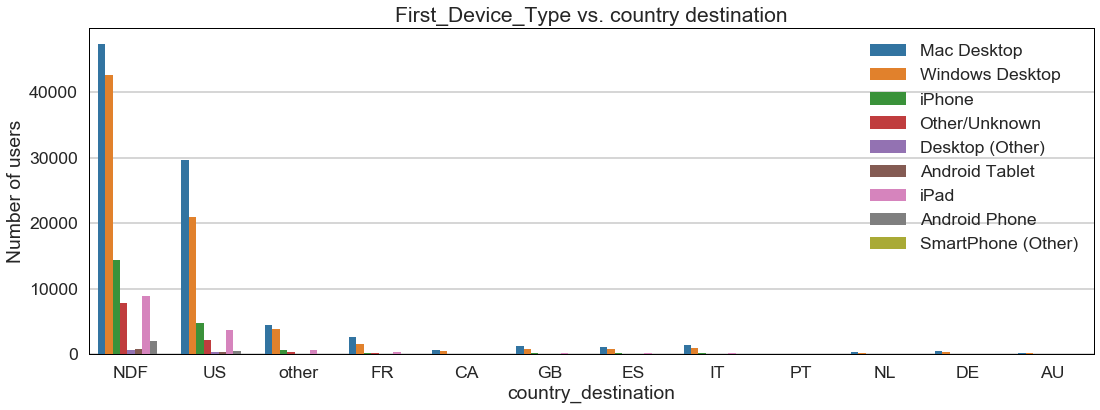

In [77]:
#Univariate Analysis on signup_method
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=data_users, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('First_Device_Type vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

People using Mac Desktop are more in number as compared to Windows Desktop in each country

<h1>Data Analysis on First_Browser</h1>

In [27]:
#Data Analysis on first_browser
unique_browsers=data_users['first_browser'].value_counts()
print(unique_browsers)

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
SlimBrowse

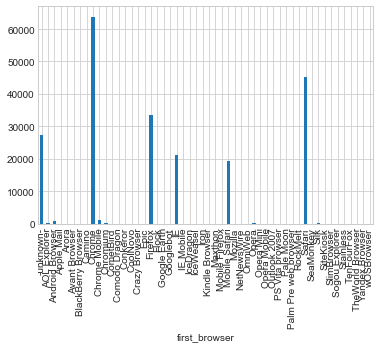

In [64]:
data_users.groupby("first_browser")['id'].count().plot.bar()

In [28]:
print("Percentage of users who choose Chrome for signup are  {0}".format(unique_browsers[0]/len(data_users)*100))
print("Percentage of users who choose Safari  for signup are  {0}".format(unique_browsers[1]/len(data_users)*100))
print("Percentage of users who choose Firefox for signup are  {0}".format(unique_browsers[2]/len(data_users)*100))

Percentage of users who choose Chrome for signup are  29.910846048976115
Percentage of users who choose Safari  for signup are  21.161296972138803
Percentage of users who choose Firefox for signup are  15.767084717335594


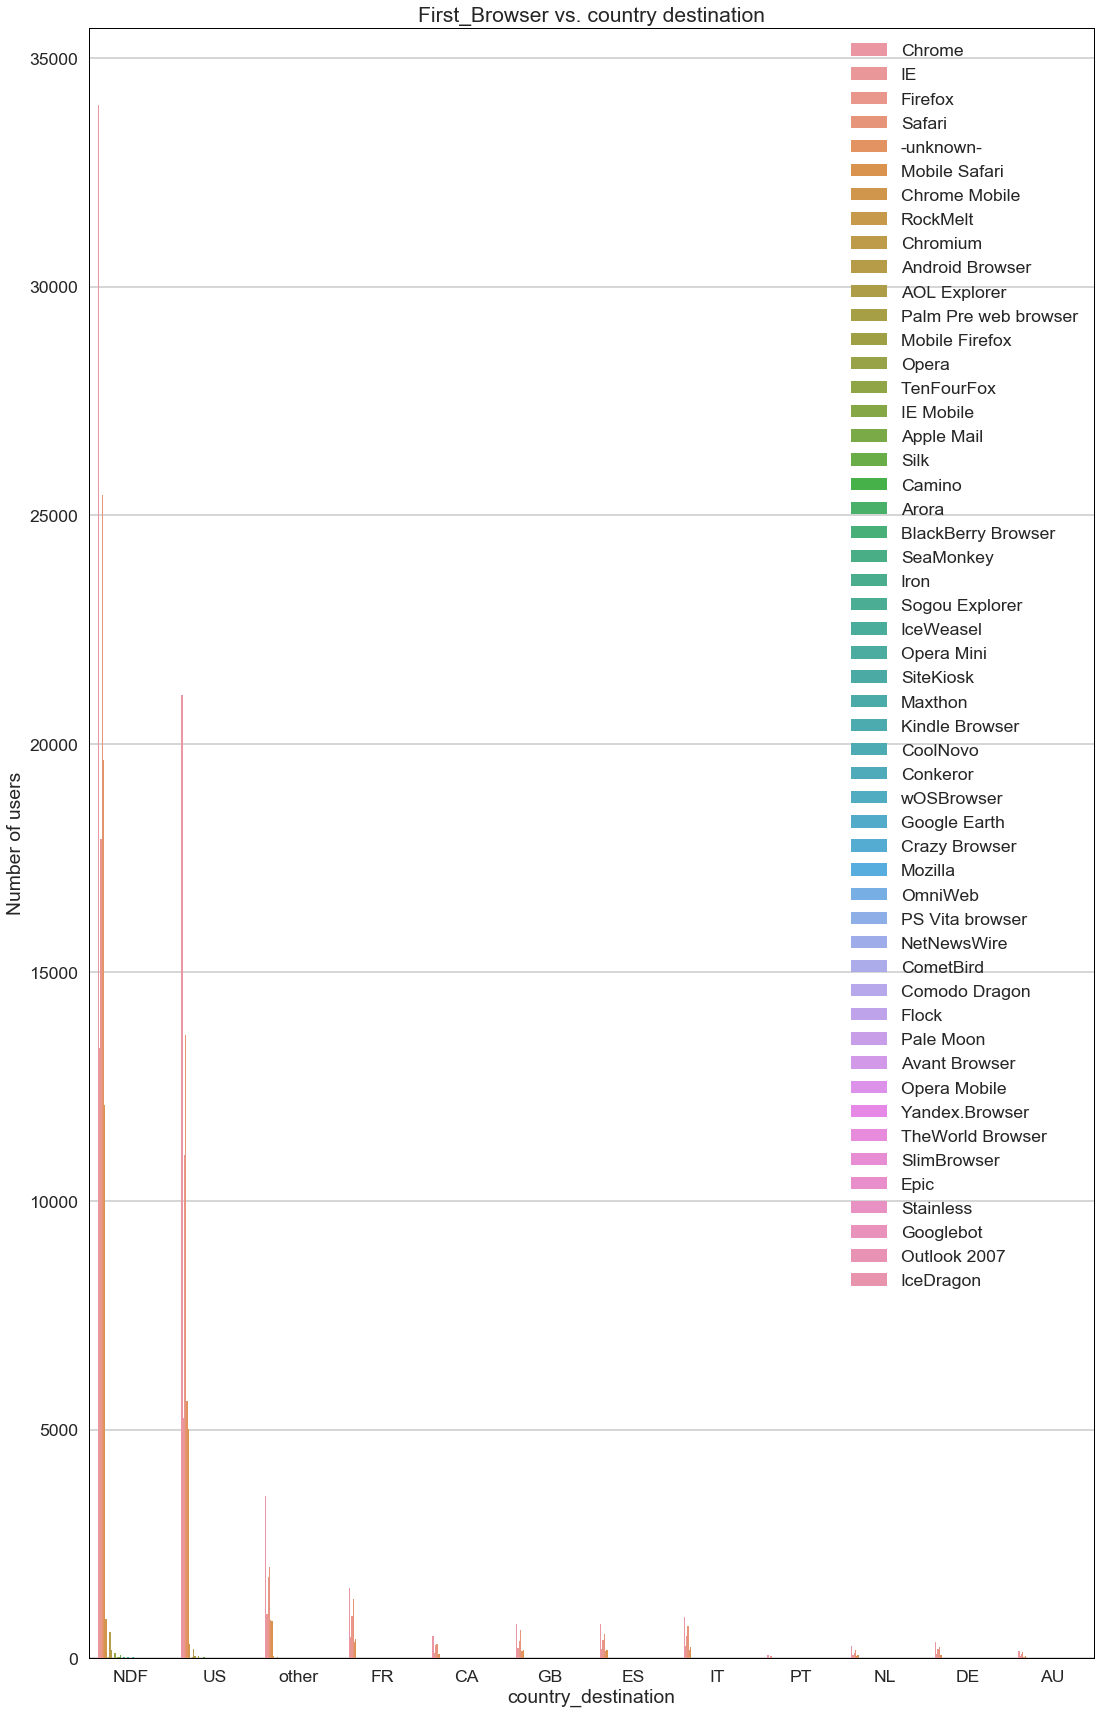

In [23]:
plt.figure(figsize=(18,30))
sns.countplot(x='country_destination', data=data_users, hue='first_browser')
plt.ylabel('Number of users')
plt.title('First_Browser vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

Chrome browser is widely used by the users in each of the countries as compared to other browsers

<h1>Data Analysis on Age</h1>

In [65]:
#Data Analysis of age
print(data_users['age'].isnull().sum()) #Number of Null values for age

87990

In [67]:
#Remvoing points where age was not present for Visualization purpose
non_null=data_users[data_users.age.notnull()]
non_null.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


C:\Users\om\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\om\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


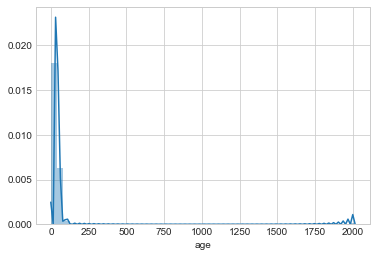

In [73]:
sns.distplot(non_null['age'],hist=True)

In [74]:
#Analysing the Counts of Age
print(data_users['age'].value_counts())

30.0      6124
31.0      6016
29.0      5963
28.0      5939
32.0      5855
27.0      5738
33.0      5527
26.0      5044
34.0      5029
35.0      4860
25.0      4459
36.0      4083
37.0      3694
38.0      3384
24.0      3220
39.0      2998
40.0      2766
41.0      2538
23.0      2462
42.0      2243
45.0      2149
44.0      2137
43.0      2056
46.0      1875
22.0      1702
47.0      1646
48.0      1469
50.0      1387
51.0      1337
49.0      1331
          ... 
91.0        12
97.0        10
15.0         8
2.0          7
113.0        4
1931.0       3
4.0          3
1949.0       3
1932.0       3
1924.0       2
1936.0       2
1947.0       2
1929.0       2
1928.0       2
1.0          2
111.0        2
1935.0       1
1926.0       1
1995.0       1
1927.0       1
2008.0       1
1953.0       1
132.0        1
150.0        1
1925.0       1
1933.0       1
1942.0       1
112.0        1
1938.0       1
1952.0       1
Name: age, Length: 127, dtype: int64


A guess for such a huge numbers for age can be that people might have entered the DOB year instead of age.Also the ages less than 5 are also seen in the dataframe

C:\Users\om\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\om\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


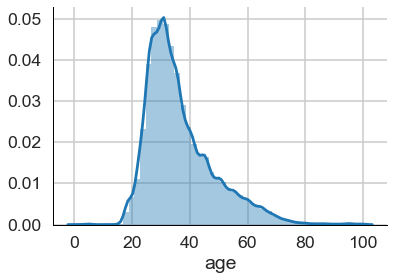

In [82]:
#Plotting the histogram/PDF for age<=100
age_hundred=data_users.loc[data_users['age'].apply(lambda x:x<=100)]['age']
sns.distplot(age_hundred,hist=True)
sns.despine()

There are many users having age between 25 to 40.Since the distribution is centered at an age of 30 roughly

In [81]:
print("Total Number of Users having age less than 100 are {0}".format(len(age_hundred)))

Total Number of Users having age less than 100 are 124682


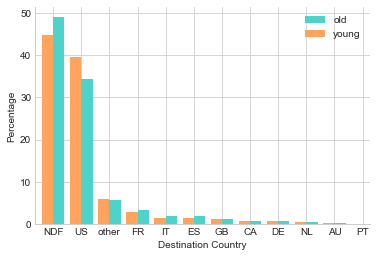

In [91]:
#Univariate Analysis on Age
old = sum(data_users['age'] > 50)
young = sum(data_users['age'] <=50)

old_destinations = data_users.loc[data_users['age'] > 50, 'country_destination'].value_counts() / old * 100
young_destinations = data_users.loc[data_users['age'] <=50 , 'country_destination'].value_counts() / young * 100

# Bar width
width = 0.4

old_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='old', rot=0)
young_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='young', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

We can see that young people are more in number than old people in US.There are round about 40% of young people in US and around 33% of old people in US. 

In [103]:
#As Observed some erroneous ages
data_users['age']=data_users['age'].apply(lambda x:2015-x if x>1000 else x)

150.0

In [105]:
data_users.loc[data_users.age > 100, 'age'] = np.nan
data_users.loc[data_users.age < 15, 'age'] = np.nan

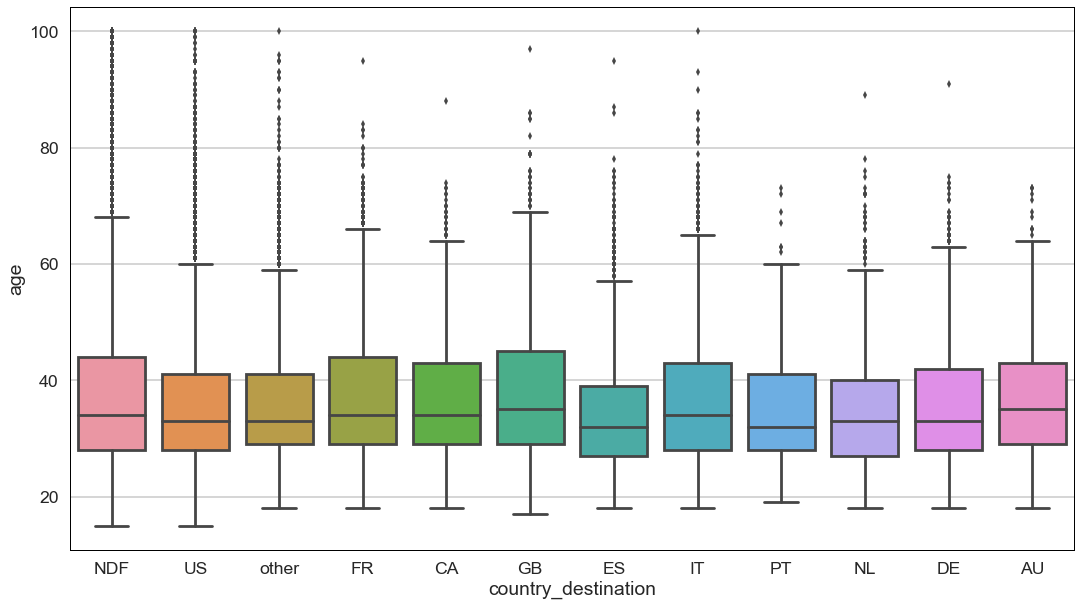

In [106]:
#Box Plot for age
plt.figure(figsize=(18,10))
sns.boxplot(x='country_destination',y='age',data=data_users)

75th Percentile Value for all the countries and NDF lies around 40.So 75% of the people have age less than or equal to 45

<h1>Data Analysis on signup_flow</h1>

C:\Users\om\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\om\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


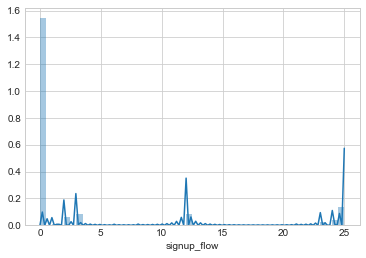

In [34]:
#Data Analysis on signup_flow
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(data_users['signup_flow'],kde=True,hist=True)

There are lot of points having signup_flow as 0

C:\Users\om\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\om\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\om\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\om\Anaconda31\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has b

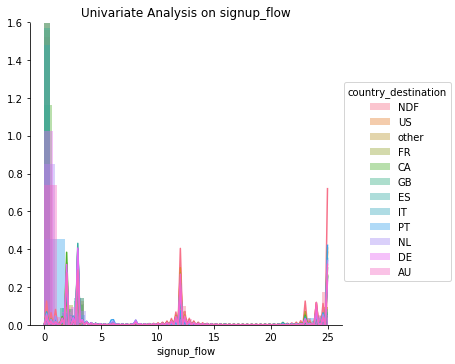

In [4]:
#Univariate Analysis
sns.FacetGrid(data_users,hue='country_destination',size=5)\
             .map(sns.distplot,"signup_flow")\
             .add_legend()
plt.title("Univariate Analysis on signup_flow")
plt.show()

Highly overlapping of PDF of each of the class is seen

In [83]:
print(data_users['signup_flow'].value_counts())

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64


In [36]:
print("The minimum value of signup_flow is {0}".format(data_users['signup_flow'].min()))
print("The maximum of signup_flow is {0}".format(data_users['signup_flow'].max()))

The minimum value of signup_flow is 0
The maximum of signup_flow is 25


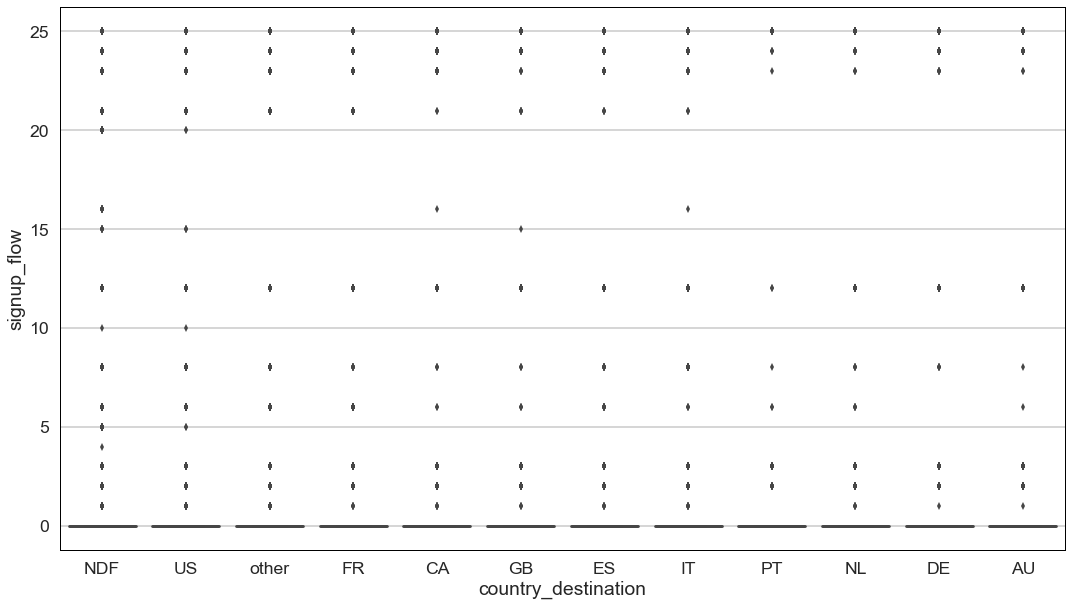

In [107]:
plt.figure(figsize=(18,10))
sns.boxplot(x='country_destination',y='signup_flow',data=data_users)

Most of the values for signup_flow for each of the country are zero but there are more points having larger signup_flow

<h1>Data Analysis on Signup_App</h1>

In [37]:
#Data Analysis on signup_app
unique_apps=data_users['signup_app'].value_counts()
print(unique_apps)

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64


In [38]:
print("Percentage of users who choose WebApp for signup are  {0}".format(unique_apps[0]/len(data_users)*100))
print("Percentage of users who choose iOsApp  for signup are  {0}".format(unique_apps[1]/len(data_users)*100))
print("Percentage of users who choose MowebApp for signup are  {0}".format(unique_apps[2]/len(data_users)*100))

Percentage of users who choose WebApp for signup are  85.60137923926334
Percentage of users who choose iOsApp  for signup are  8.910241694815204
Percentage of users who choose MowebApp for signup are  2.9332258925936165


So more than 85% of the users are using the WebApp to interact with airbnb and book tickets.

<h1>Data Analysis on Country_Destination</h1>

In [48]:
#Data Analysis on Country_Destination
unique_countries=dict(data_users['country_destination'].value_counts())
print(unique_countries)  #NDF:No Destination Found(There wasnt a booking)

{'NDF': 124543, 'US': 62376, 'other': 10094, 'FR': 5023, 'IT': 2835, 'GB': 2324, 'ES': 2249, 'CA': 1428, 'DE': 1061, 'NL': 762, 'AU': 539, 'PT': 217}


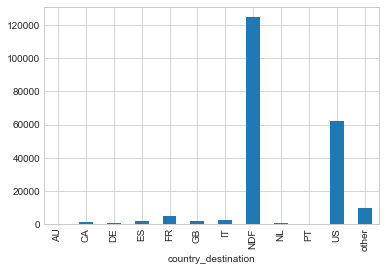

In [50]:
data_users.groupby("country_destination")['id'].count().plot.bar()

There are lot of users who have not booked their ticket since NDF corresponds to No Destination Found.

In [51]:
print("Percentage of users for NDF {0}".format(unique_countries['NDF']/len(data_users)*100))
print("Percentage of users for USA  {0}".format(unique_countries['US']/len(data_users)*100))
print("Percentage of users for other  {0}".format(unique_countries['other']/len(data_users)*100))

Percentage of users for NDF 58.34734904029496
Percentage of users for USA  29.222631892097017
Percentage of users for other  4.72895418620667


More than 50 % of the users were unable to book the ticket because the destination was not found(NDF)

No handles with labels found to put in legend.


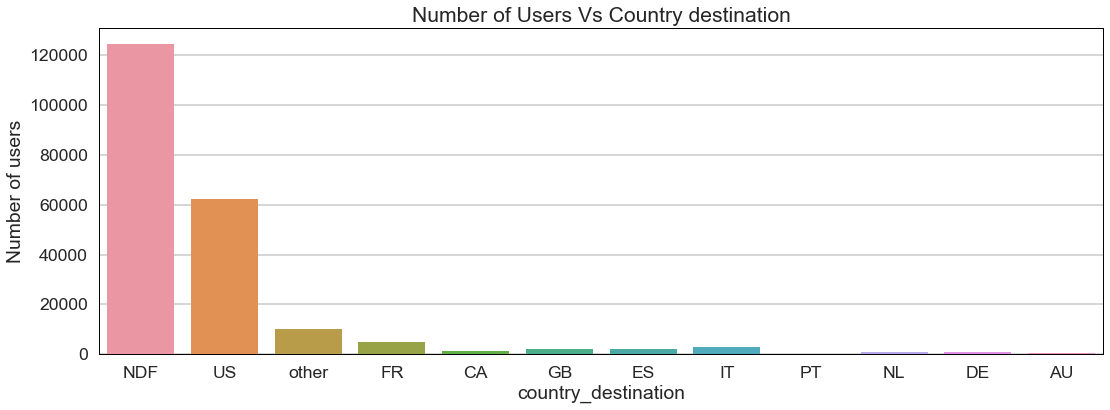

In [21]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=data_users)
plt.ylabel('Number of users')
plt.title('Number of Users Vs Country destination')
plt.legend(loc = 'upper right')
plt.show()

Almost 60 % of people were not able to book their destination <br>Nearly 30% of the users have booked their destination in US country and since it is known that  user population in this problem is from US.So these people are travelling acroos the citites in US 

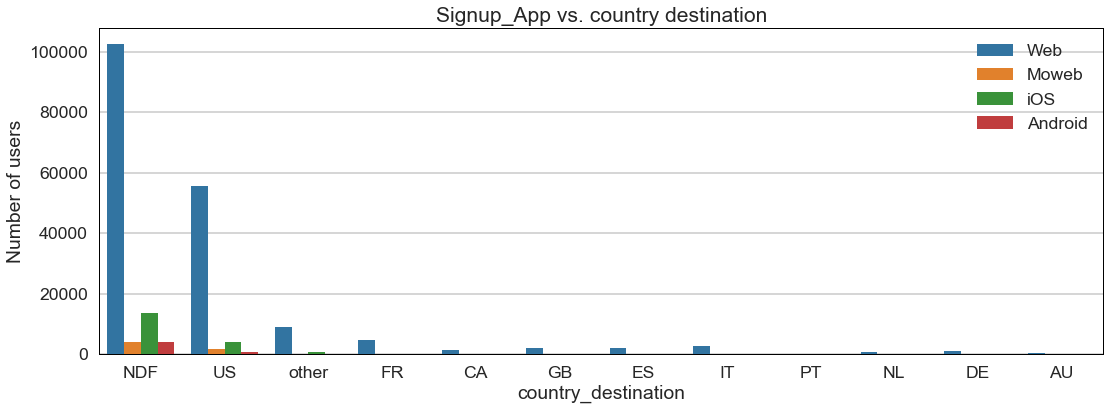

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=data_users, hue='signup_app')
plt.ylabel('Number of users')
plt.title('Signup_App vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

In each of the country most of the people are using WebApp to interact with the Airbnb's platform

<h1>Data Analysis on Gender</h1>

In [108]:
#Data Analysis on Gender
data_users.gender.replace('-unknown-', np.nan, inplace=True) #Replacing -unknown- gender with NAN

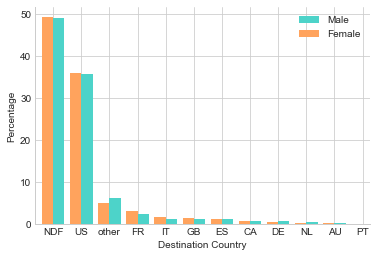

In [88]:
#Univariate Analysis with Gender
women = sum(data_users['gender'] == 'FEMALE')
men = sum(data_users['gender'] == 'MALE')

female_destinations = data_users.loc[data_users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = data_users.loc[data_users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

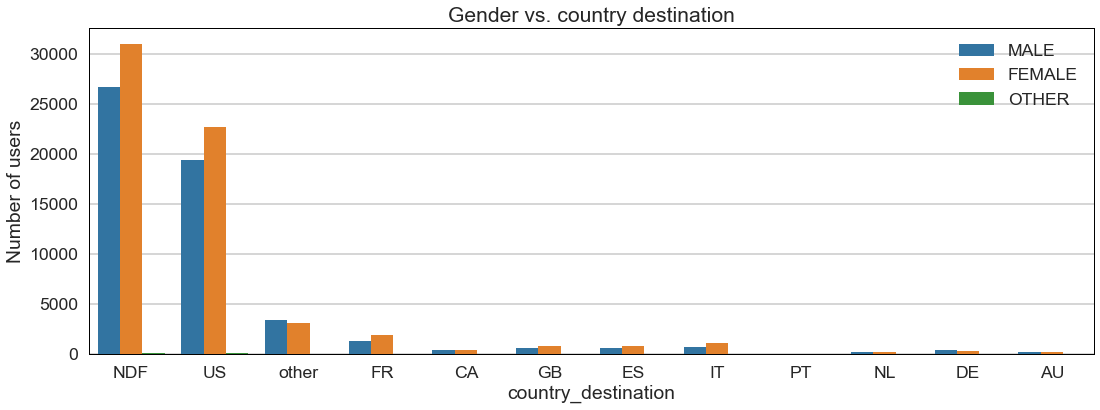

In [109]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=data_users, hue='gender')
plt.ylabel('Number of users')
plt.title('Gender vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

The plots for both male and female looks very identical.So the above plot is not much helpful,It can be used to just interpret the distrubutions of male and female

<h1>Data Analysis on Language</h1>

In [93]:
#Data Analysis on Language
unique_languages=data_users['language'].value_counts()
print(unique_languages)

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64


In [94]:
print("Percentage of users speaking english are {0}".format(unique_languages[0]/len(data_users)*100))

Percentage of users speaking english are 96.65637546790599


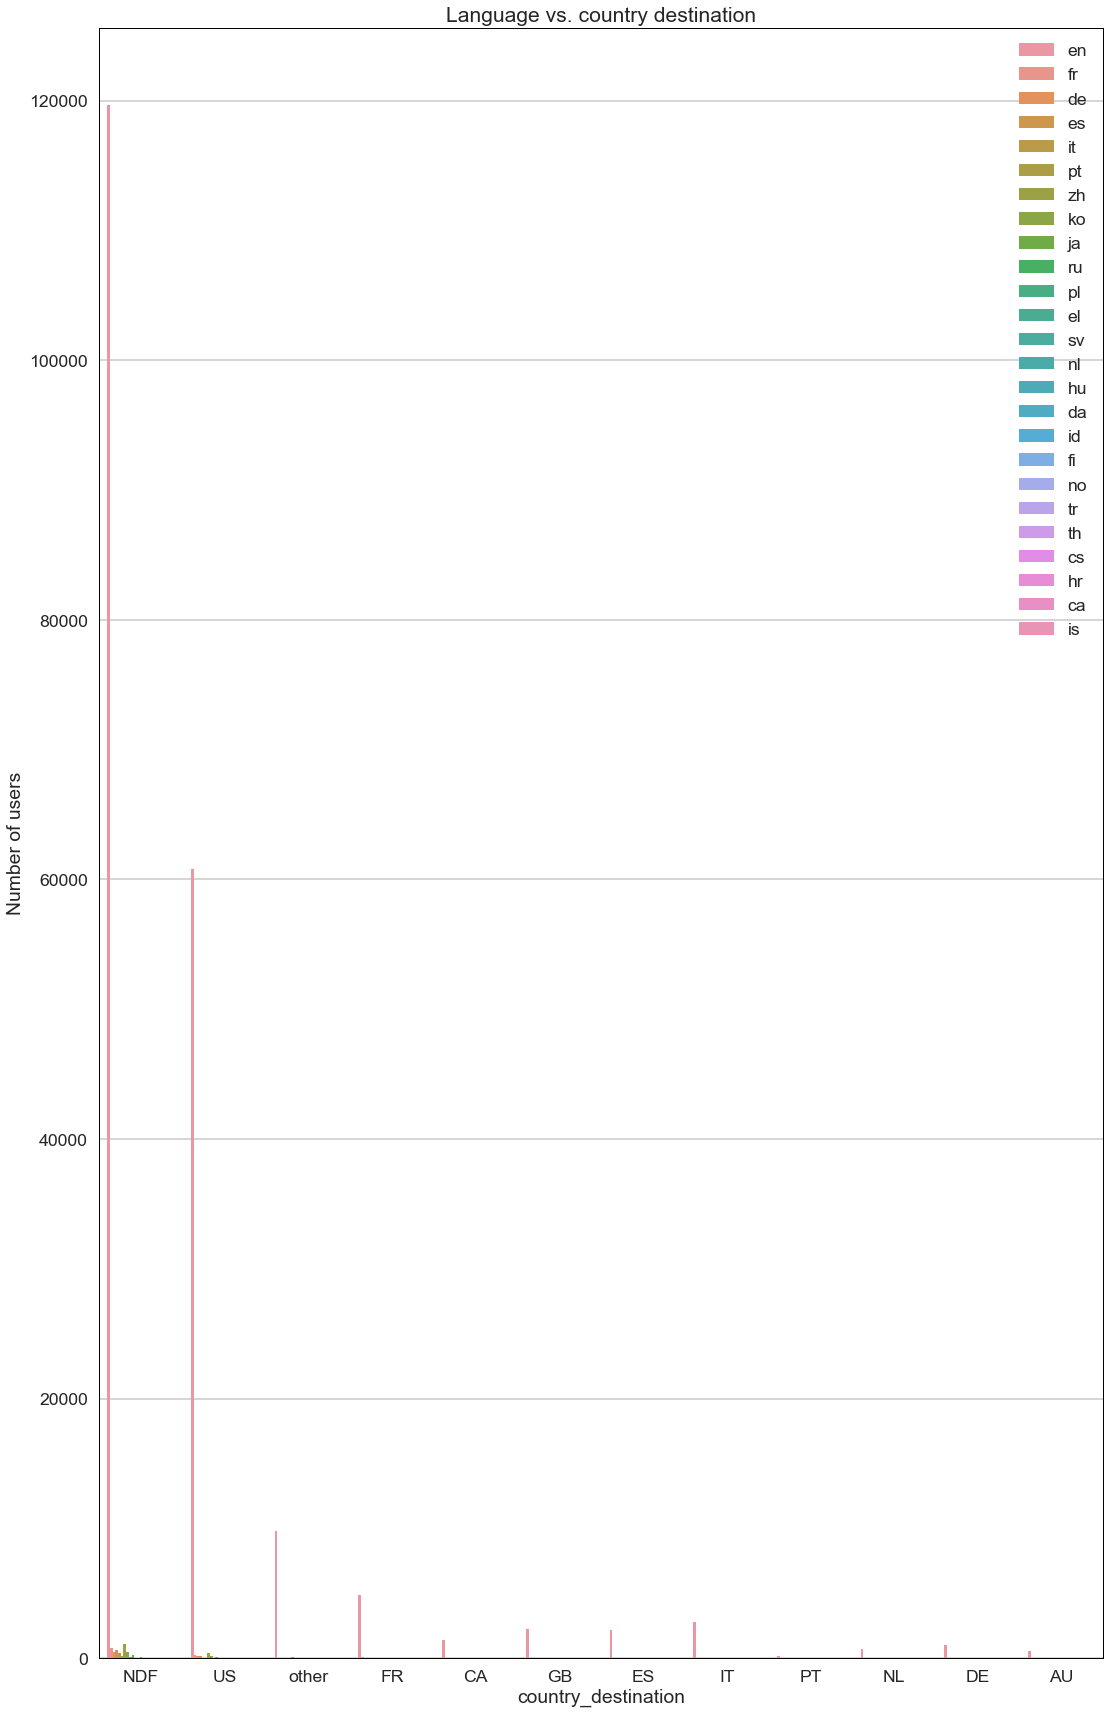

In [18]:
plt.figure(figsize=(18,30))
sns.countplot(x='country_destination', data=data_users, hue='language')
plt.ylabel('Number of users')
plt.title('Language vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

Almost all the users in each of the country speak English which is expected as it was observed that 96% of the users speak English

<h1>Data Analysis on affiliate_channel</h1>

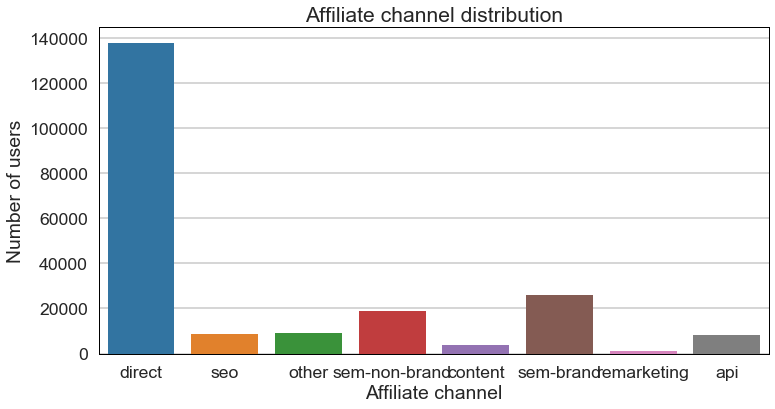

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='affiliate_channel', data=data_users)
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel distribution')
plt.show()

We can see that lot of users came to Airbnb's Website directly

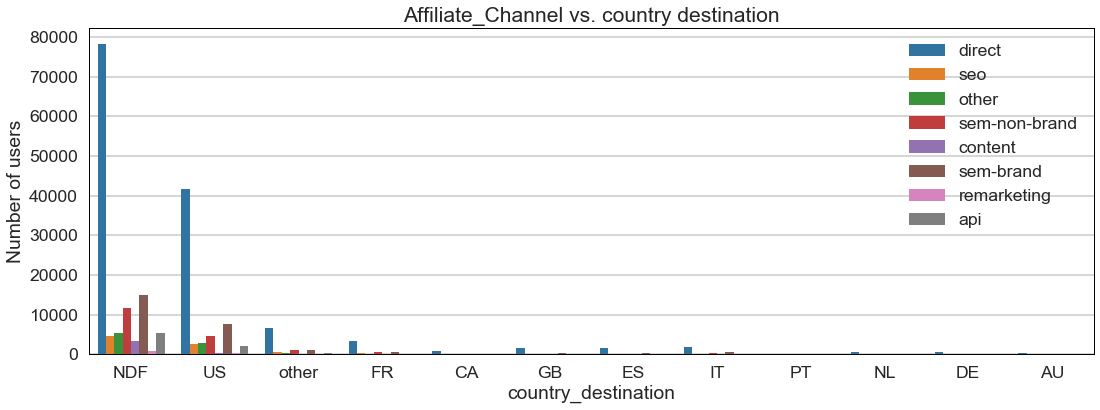

In [28]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=data_users, hue='affiliate_channel')
plt.ylabel('Number of users')
plt.title('Affiliate_Channel vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

Most of the people in all the countries have interacted with Airbnb's Website directly

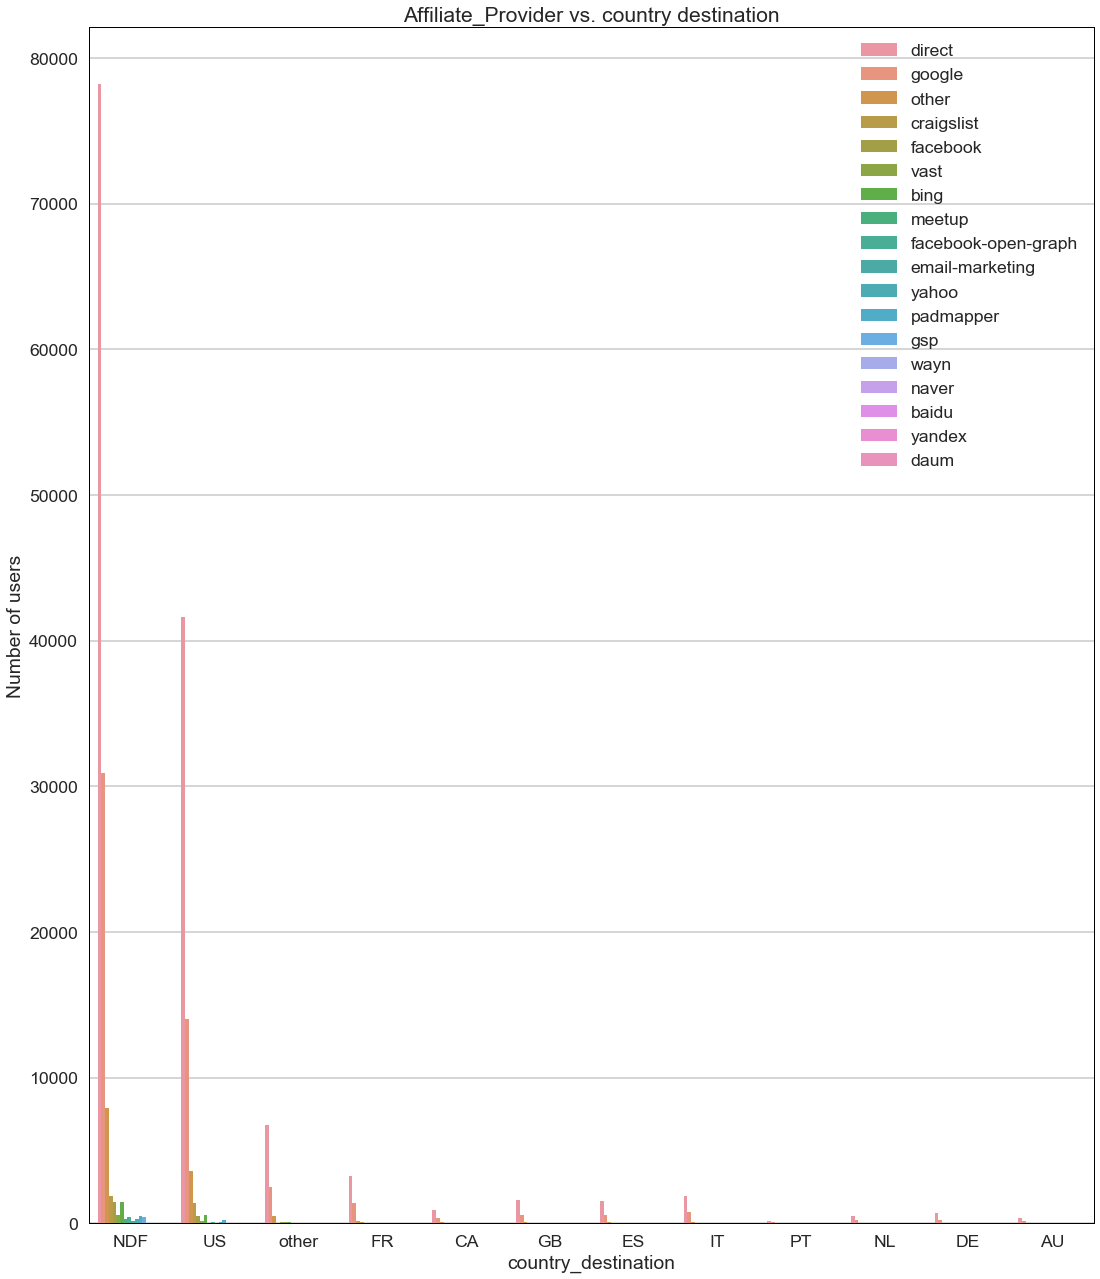

In [27]:
plt.figure(figsize=(18,22))
sns.countplot(x='country_destination', data=data_users, hue='affiliate_provider')
plt.ylabel('Number of users')
plt.title('Affiliate_Provider vs. country destination')
plt.legend(loc = 'upper right')
plt.show()

Most of the people in each of the country have used direct method to interat with airbnb,while some of them have used Google as one of the affilfiate provider

In [ ]:
data_users['date_account_created'] = pd.to_datetime(data_users['date_account_created'])
data_users['timestamp_first_active'] = pd.to_datetime((data_users.timestamp_first_active)//1000000, format='%Y%m%d')

In [38]:
data_users.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF


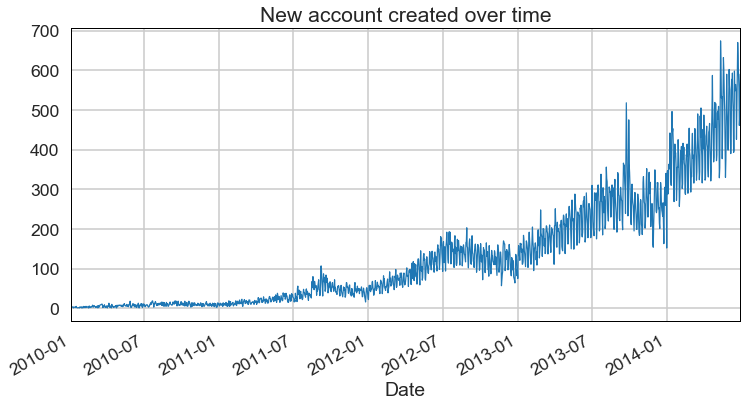

In [39]:
plt.figure(figsize=(12,6))
data_users.date_account_created.value_counts().plot(kind='line', linewidth=1.2)
plt.xlabel('Date')
plt.title('New account created over time')
plt.show()

There is a huge increase in number of accounts created in Airbnb's Webiste from 2013.

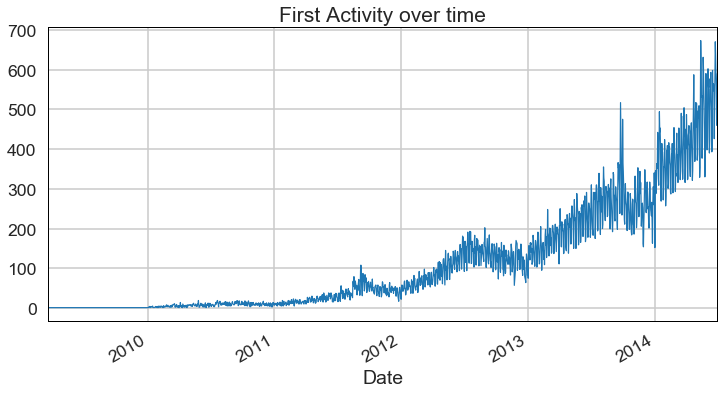

In [44]:
plt.figure(figsize=(12,6))
data_users.timestamp_first_active.value_counts().plot(kind='line', linewidth=1.2)
plt.xlabel('Date')
plt.title('First Activity over time')
plt.show()

<h1>Reading Data from Sessions.csv</h1>

In [47]:
#Reading Sessions.csv
sessions_users=pd.read_csv("sessions.csv")
sessions_users.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [49]:
print("Total Number of Unique Users in Sessions.csv are {0}".format(len(sessions_users.user_id.unique())))

Total Number of Unique Users in Sessions.csv are 135484


In [50]:
#Checking for NULL Values
display(sessions_users.isnull().sum())

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [55]:
unique_actions_type=sessions_users.action_type.value_counts()
unique_actions_type

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [57]:
sessions_users.action_type.replace('-unknown-',np.nan,inplace=True)
sessions_users.action_detail.replace('-unknown-',np.nan,inplace=True)